# **Section A: Employee Attrition Data Exploration & Analysis**

## **Project Objective**:

This section analyzes employee attrition patterns using Python, focusing on income distribution, tenure, and demographic factors to support HR decision-making.


### **1. Import Libraries & Load Dataset**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')  # Cleaner plot aesthetics

# Load dataset
df = pd.read_csv("employee_dataset.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Display first few rows
df.head()

Missing values per column:
 Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
StockOptionLevel           0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64


,Age,BusinessTravel,MonthlyIncome,JobSatisfaction,Bonus,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,JobRole,MaritalStatus,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,OverTime,Attrition
0,41,Travel_Rarely,5993,4,17979,Sales,1,2,Life Sciences,1,...,Sales Executive,Single,3,0,0,1,6,0,Yes,Yes
1,49,Travel_Frequently,5130,2,20520,Research & Development,8,1,Life Sciences,1,...,Research Scientist,Married,4,1,3,3,10,1,No,No
2,37,Travel_Rarely,2090,3,6270,Research & Development,2,2,Other,1,...,Laboratory Technician,Single,3,0,3,3,0,0,Yes,Yes
3,33,Travel_Frequently,2909,3,8727,Research & Development,3,4,Life Sciences,1,...,Research Scientist,Married,3,0,3,3,8,3,Yes,No
4,27,Travel_Rarely,3468,2,10404,Research & Development,2,1,Medical,1,...,Laboratory Technician,Married,3,1,3,3,2,2,No,No


### **2. Dataset Overview**

### **2.1 Number of Attributes and Dataset Dimensions**

In [ ]:
num_attributes = df.shape[1]
dataset_dimension = df.shape

print(f"Number of attributes: {num_attributes}")
print(f"Dataset dimensions (rows, columns): {dataset_dimension}")

Number of attributes: 24
Dataset dimensions (rows, columns): (1470, 24)


### **3. Descriptive Statistics**

### **3.1 Average Employee Metrics**

- Includes Age, Monthly Income, and Years at Company.

In [ ]:
average_values = df[['Age', 'MonthlyIncome', 'YearsAtCompany']].mean().round(2)
average_values

,0
Age,36.92
MonthlyIncome,6502.93
YearsAtCompany,7.01


### **3.2 Monthly Income Range**

In [ ]:
min_income = df['MonthlyIncome'].min()
max_income = df['MonthlyIncome'].max()

print(f"Minimum Monthly Income: ${min_income}")
print(f"Maximum Monthly Income: ${max_income}")

Minimum Monthly Income: $1009
Maximum Monthly Income: $19999


### **4. Monthly Income Distribution**

### **4.1 Histogram with KDE**

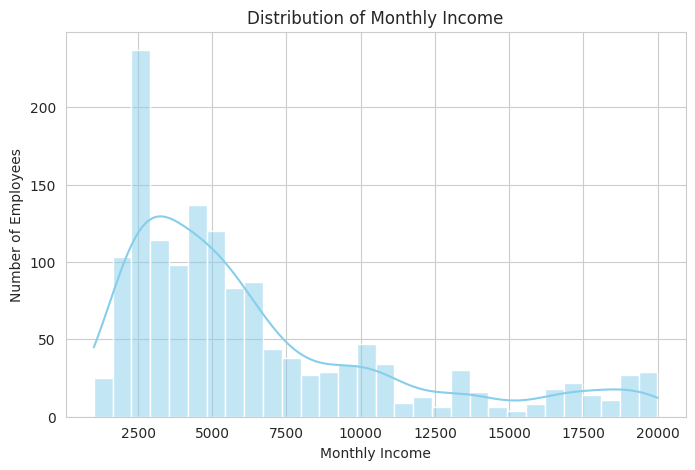

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='skyblue')
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")
plt.title("Distribution of Monthly Income")
plt.show()

**Insight**: The distribution is **right-skewed**, indicating most employees earn in lower-to-mid income brackets.

### **4.2 Boxplot of Monthly Income by Job Level**

/tmp/ipython-input-3782340982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome', palette='pastel')


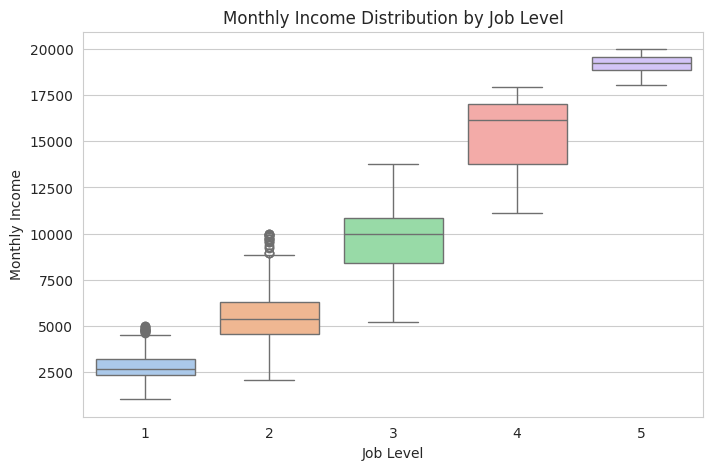

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome', palette='pastel')
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.title("Monthly Income Distribution by Job Level")
plt.show()

**Insight**: Income increases with Job Level, but outliers indicate variation within levels.

### **4.3 Boxplot of Monthly Income by Department**

/tmp/ipython-input-3802413221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2')


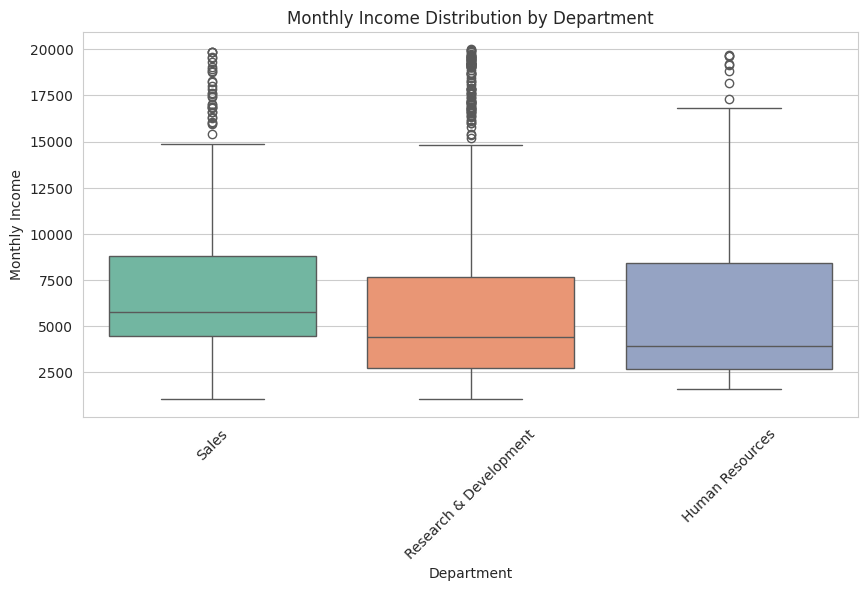

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2')
plt.xlabel("Department")
plt.ylabel("Monthly Income")
plt.title("Monthly Income Distribution by Department")
plt.xticks(rotation=45)
plt.show()

**Insight**: Departments differ in salary distributions, highlighting organizational structure and role differences.

### **5. Income vs Tenure Analysis**

### **5.1 Scatter Plot: Years at Company vs Monthly Income**

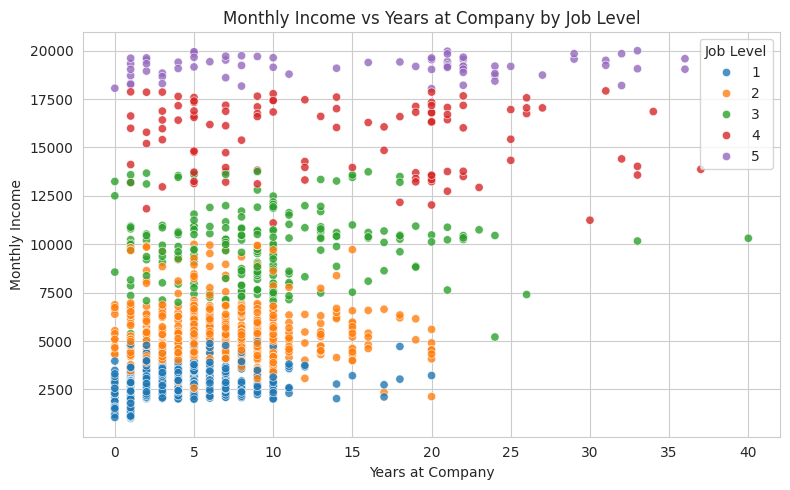

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='YearsAtCompany',
    y='MonthlyIncome',
    hue='JobLevel',
    palette='tab10',
    alpha=0.8
)
plt.xlabel("Years at Company")
plt.ylabel("Monthly Income")
plt.title("Monthly Income vs Years at Company by Job Level")
plt.legend(title="Job Level")
plt.tight_layout()
plt.show()

### **5.2 Correlation Analysis**

In [ ]:
correlation = df['YearsAtCompany'].corr(df['MonthlyIncome'])
print(f"Correlation between Years at Company and Monthly Income: {round(correlation,2)}")

Correlation between Years at Company and Monthly Income: 0.51


**Insight**: Moderate positive correlation indicates income generally increases with tenure.

### **5.3 Correlation Heatmap (Numeric Features)**

Numeric columns used for correlation heatmap: ['Age', 'MonthlyIncome', 'JobSatisfaction', 'Bonus', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobLevel', 'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion']


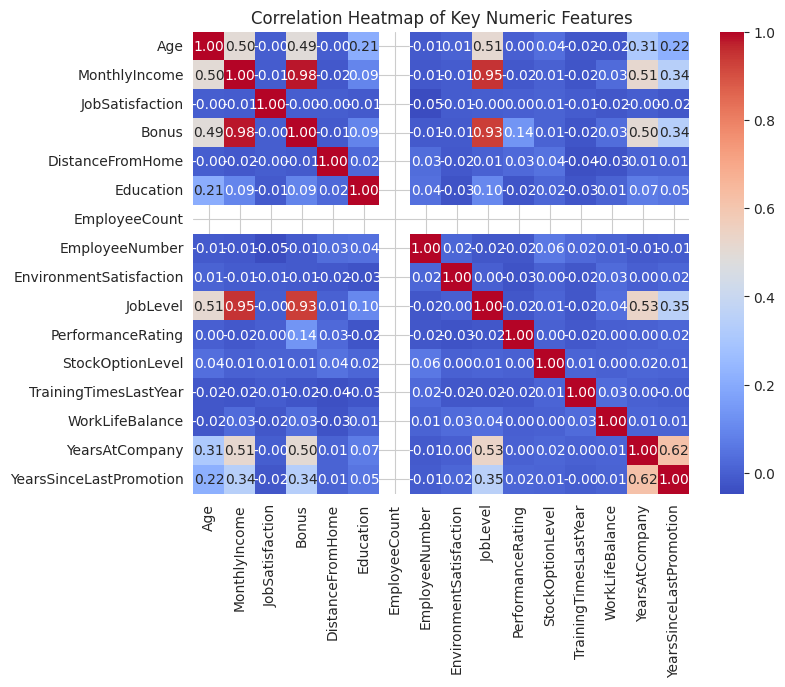

In [ ]:
# Automatically select numeric columns to avoid KeyError
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns used for correlation heatmap:", numeric_cols)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

**Insight**: This heatmap identifies relationships between numeric employee metrics such as income, tenure, and age.

### **6. Key Findings**

| Area             | Observation              | Insight                                                                   |
| ---------------- | ------------------------ | ------------------------------------------------------------------------- |
| Monthly Income   | $1,009 – $19,999         | Diverse roles and seniority levels                                        |
| Distribution     | Right-skewed             | Most employees earn in lower-to-mid brackets                              |
| Job Level        | Higher levels earn more  | Boxplots confirm expected progression                                     |
| Department       | Salary differences exist | Reflects organizational structure and role variation                      |
| Tenure vs Income | Correlation = 0.51       | Income generally grows with experience, influenced by promotions and role |


### **7. Section Summary**

- Employee income is right-skewed; most employees earn in lower-to-mid ranges.

- Income generally grows with tenure, but Job Level and Department strongly influence salary.

- Boxplots and heatmaps provide actionable insights for HR compensation and retention decisions.

- Income growth exists but does not solely determine employee retention.